Modelling crime risk associated with Green Spaces
---
A case study of New York City using NYPD Complaint Data and Machine Learning models

| Authors                        | Student ID   |
|--------------------------------|--------------|
| Kaninik Baradi                 | 5216664      |
| Lala Sayyida Millati Nadhira   | 5844266      |
| Rezzy Yolanda Wulandhari       | 4779487      |
| Kelvin Engee                   | 4664043      |
| Philippe Almeida Mirault       | 5898803      |
Group 4

For the course: Responsible Data Analytics, SEN 163B
April 2023

# Introduction
This notebook is a companion to the report on Modelling Crime Risks associated with Green spaces. It contains all the code required to download, pre-process and analyse the data. The notebook is divided into the following sections:
- Preparation
- Descriptive Analytics
    - Preliminary Analysis
- Diagnostic Analytics
    - Feature Analysis
    - Feature Engineering
    - Bias Analysis
- Predictive Analysis
    - Target Variable Analysis
    - Train-Test Split Strategy
    - Model Evaluation
    - Model Interpretation
- Prescriptive Analysis
    - Cross Validation
    - Ensemble Predictor
    - Model Deployment

# Preparation

Dependencies:

Data Sources:

In [58]:
import pandas
import altair
import numpy
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import seaborn as sns

# Descriptive Analytics
This section contains the initial analysis of the selected data sets. It identifies the underlying relationships of the variables and if used to determine vriables of interest for further analysis.

## Complaints Data

In [59]:
# Create a function that selects every third number
def every_nth(n):
    return n % 3 == 0

crime_data = pandas.read_csv("..\\NYPD_Complaint_Data_Historic.csv", skiprows=lambda i: i>0 and every_nth(i))

C:\Users\Kaninik Baradi\AppData\Local\Temp\ipykernel_30696\1880536223.py:5: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pandas.read_csv("..\\NYPD_Complaint_Data_Historic.csv", skiprows=lambda i: i>0 and every_nth(i))


In [60]:
def make_categorical(dataframe, column):
    # make the column of the dataframe categorical
    dataframe[column] = dataframe[column].astype('category')

# get a lst of all the columns in the dataframe that need to be categorical

columns = ['ADDR_PCT_CD', 'BORO_NM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT', 'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD', 'PD_DESC', 'STATION_NAME', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_RACE', 'VIC_SEX']

    # make each column categorical
for column in columns:
    make_categorical(crime_data, column)




In [61]:
print(crime_data)

         CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM   
0         506547392   03/29/2018     20:30:00          NaN          NaN  \
1         629632833   02/06/2018     23:15:00          NaN          NaN   
2         280364018   06/09/2018     21:42:00   06/09/2018     21:43:00   
3         985800320   11/10/2018     19:40:00   11/10/2018     19:45:00   
4         803743247   04/07/2013     16:00:00          NaN          NaN   
...             ...          ...          ...          ...          ...   
5216995   138682847   07/21/2018     20:18:00          NaN          NaN   
5216996   104527061   05/01/2008     18:55:00   05/01/2018     19:00:00   
5216997   284201488   05/18/2018     14:50:00   05/18/2018     14:55:00   
5216998   649441648   02/03/2018     10:02:00   02/03/2018     12:15:00   
5216999   803166404   01/05/2018     14:40:00   01/05/2018     16:00:00   

        ADDR_PCT_CD      RPT_DT KY_CD                       OFNS_DESC  PD_CD   
0              32.0

In [62]:
#scrub for duplicate
crime_data.drop_duplicates(inplace=True)
print(crime_data)

         CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM   
0         506547392   03/29/2018     20:30:00          NaN          NaN  \
1         629632833   02/06/2018     23:15:00          NaN          NaN   
2         280364018   06/09/2018     21:42:00   06/09/2018     21:43:00   
3         985800320   11/10/2018     19:40:00   11/10/2018     19:45:00   
4         803743247   04/07/2013     16:00:00          NaN          NaN   
...             ...          ...          ...          ...          ...   
5216995   138682847   07/21/2018     20:18:00          NaN          NaN   
5216996   104527061   05/01/2008     18:55:00   05/01/2018     19:00:00   
5216997   284201488   05/18/2018     14:50:00   05/18/2018     14:55:00   
5216998   649441648   02/03/2018     10:02:00   02/03/2018     12:15:00   
5216999   803166404   01/05/2018     14:40:00   01/05/2018     16:00:00   

        ADDR_PCT_CD      RPT_DT KY_CD                       OFNS_DESC  PD_CD   
0              32.0

In [63]:
#scrub for irrelevant data (only use required columns)
crime_data = crime_data[['CMPLNT_FR_DT','CMPLNT_FR_TM','Longitude','Latitude','VIC_SEX','VIC_RACE','VIC_AGE_GROUP']]


In [64]:
crime_data

,CMPLNT_FR_DT,CMPLNT_FR_TM,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP
0,03/29/2018,20:30:00,-73.941064,40.810877,F,WHITE,25-44
1,02/06/2018,23:15:00,-73.908014,40.873671,D,UNKNOWN,UNKNOWN
2,06/09/2018,21:42:00,-73.994706,40.759310,F,WHITE HISPANIC,18-24
3,11/10/2018,19:40:00,-73.970728,40.764536,D,UNKNOWN,UNKNOWN
4,04/07/2013,16:00:00,-73.799677,40.703555,E,UNKNOWN,NaN
...,...,...,...,...,...,...,...
5216995,07/21/2018,20:18:00,-73.892285,40.864345,F,BLACK,25-44
5216996,05/01/2008,18:55:00,-73.996540,40.756788,E,UNKNOWN,UNKNOWN
5216997,05/18/2018,14:50:00,-74.102317,40.577953,M,WHITE HISPANIC,<18
5216998,02/03/2018,10:02:00,-74.089000,40.593665,M,WHITE,45-64


In [65]:
#unlike usual, all the rows with missing data is deleted beforehand, because there all the data is missing completely at random
missing_counts = crime_data.isna().sum()

print(missing_counts)

CMPLNT_FR_DT         442
CMPLNT_FR_TM          32
Longitude          11550
Latitude           11550
VIC_SEX              204
VIC_RACE             257
VIC_AGE_GROUP    1091233
dtype: int64


In [66]:
crime_data = crime_data.dropna(axis=0)

print(crime_data)

        CMPLNT_FR_DT CMPLNT_FR_TM  Longitude   Latitude VIC_SEX   
0         03/29/2018     20:30:00 -73.941064  40.810877       F  \
1         02/06/2018     23:15:00 -73.908014  40.873671       D   
2         06/09/2018     21:42:00 -73.994706  40.759310       F   
3         11/10/2018     19:40:00 -73.970728  40.764536       D   
5         09/12/2018     18:30:00 -73.906892  40.853653       D   
...              ...          ...        ...        ...     ...   
5216995   07/21/2018     20:18:00 -73.892285  40.864345       F   
5216996   05/01/2008     18:55:00 -73.996540  40.756788       E   
5216997   05/18/2018     14:50:00 -74.102317  40.577953       M   
5216998   02/03/2018     10:02:00 -74.089000  40.593665       M   
5216999   01/05/2018     14:40:00 -73.944529  40.688872       F   

               VIC_RACE VIC_AGE_GROUP  
0                 WHITE         25-44  
1               UNKNOWN       UNKNOWN  
2        WHITE HISPANIC         18-24  
3               UNKNOWN       UNKNO

In [67]:
#unlike usual, all the rows with missing data is deleted beforehand, because there all the data is missing completely at random
missing_counts = crime_data.isna().sum()

print(missing_counts)

CMPLNT_FR_DT     0
CMPLNT_FR_TM     0
Longitude        0
Latitude         0
VIC_SEX          0
VIC_RACE         0
VIC_AGE_GROUP    0
dtype: int64


# CMPLNT_FR_DT


In [68]:
crime_data[['month','day','year']] = crime_data['CMPLNT_FR_DT'].str.split('/',expand=True).astype(int)

C:\Users\Kaninik Baradi\AppData\Local\Temp\ipykernel_30696\3669391758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data[['month','day','year']] = crime_data['CMPLNT_FR_DT'].str.split('/',expand=True).astype(int)
C:\Users\Kaninik Baradi\AppData\Local\Temp\ipykernel_30696\3669391758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data[['month','day','year']] = crime_data['CMPLNT_FR_DT'].str.split('/',expand=True).astype(int)
C:\Users\Kaninik Baradi\AppData\Local\Temp\ipykernel_30696\366

In [69]:
crime_data

,CMPLNT_FR_DT,CMPLNT_FR_TM,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP,month,day,year
0,03/29/2018,20:30:00,-73.941064,40.810877,F,WHITE,25-44,3,29,2018
1,02/06/2018,23:15:00,-73.908014,40.873671,D,UNKNOWN,UNKNOWN,2,6,2018
2,06/09/2018,21:42:00,-73.994706,40.759310,F,WHITE HISPANIC,18-24,6,9,2018
3,11/10/2018,19:40:00,-73.970728,40.764536,D,UNKNOWN,UNKNOWN,11,10,2018
5,09/12/2018,18:30:00,-73.906892,40.853653,D,UNKNOWN,UNKNOWN,9,12,2018
...,...,...,...,...,...,...,...,...,...,...
5216995,07/21/2018,20:18:00,-73.892285,40.864345,F,BLACK,25-44,7,21,2018
5216996,05/01/2008,18:55:00,-73.996540,40.756788,E,UNKNOWN,UNKNOWN,5,1,2008
5216997,05/18/2018,14:50:00,-74.102317,40.577953,M,WHITE HISPANIC,<18,5,18,2018
5216998,02/03/2018,10:02:00,-74.089000,40.593665,M,WHITE,45-64,2,3,2018


In [70]:
crime_data = crime_data.loc[crime_data['year'] >= 2006]

In [71]:
crime_data['CMPLNT_FR_DT'] = pandas.to_datetime(crime_data['CMPLNT_FR_DT'], format='%m/%d/%Y')
crime_data['day_of_week'] = crime_data['CMPLNT_FR_DT'].dt.dayofweek

C:\Users\Kaninik Baradi\AppData\Local\Temp\ipykernel_30696\2150539645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['CMPLNT_FR_DT'] = pandas.to_datetime(crime_data['CMPLNT_FR_DT'], format='%m/%d/%Y')
C:\Users\Kaninik Baradi\AppData\Local\Temp\ipykernel_30696\2150539645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['day_of_week'] = crime_data['CMPLNT_FR_DT'].dt.dayofweek


In [72]:
crime_data = crime_data.drop('CMPLNT_FR_DT', axis=1)
crime_data = crime_data.drop('month', axis=1)
crime_data = crime_data.drop('day', axis=1)
crime_data

,CMPLNT_FR_TM,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP,year,day_of_week
0,20:30:00,-73.941064,40.810877,F,WHITE,25-44,2018,3
1,23:15:00,-73.908014,40.873671,D,UNKNOWN,UNKNOWN,2018,1
2,21:42:00,-73.994706,40.759310,F,WHITE HISPANIC,18-24,2018,5
3,19:40:00,-73.970728,40.764536,D,UNKNOWN,UNKNOWN,2018,5
5,18:30:00,-73.906892,40.853653,D,UNKNOWN,UNKNOWN,2018,2
...,...,...,...,...,...,...,...,...
5216995,20:18:00,-73.892285,40.864345,F,BLACK,25-44,2018,5
5216996,18:55:00,-73.996540,40.756788,E,UNKNOWN,UNKNOWN,2008,3
5216997,14:50:00,-74.102317,40.577953,M,WHITE HISPANIC,<18,2018,4
5216998,10:02:00,-74.089000,40.593665,M,WHITE,45-64,2018,5


# CMPLNT_FR_TM

In [73]:
crime_data[['hour','minute','second']] = crime_data['CMPLNT_FR_TM'].str.split(':',expand=True).astype(int)

In [74]:
crime_data = crime_data.drop('CMPLNT_FR_TM', axis=1)
crime_data = crime_data.drop('second', axis=1)
crime_data = crime_data.drop('minute', axis=1)
crime_data

,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP,year,day_of_week,hour
0,-73.941064,40.810877,F,WHITE,25-44,2018,3,20
1,-73.908014,40.873671,D,UNKNOWN,UNKNOWN,2018,1,23
2,-73.994706,40.759310,F,WHITE HISPANIC,18-24,2018,5,21
3,-73.970728,40.764536,D,UNKNOWN,UNKNOWN,2018,5,19
5,-73.906892,40.853653,D,UNKNOWN,UNKNOWN,2018,2,18
...,...,...,...,...,...,...,...,...
5216995,-73.892285,40.864345,F,BLACK,25-44,2018,5,20
5216996,-73.996540,40.756788,E,UNKNOWN,UNKNOWN,2008,3,18
5216997,-74.102317,40.577953,M,WHITE HISPANIC,<18,2018,4,14
5216998,-74.089000,40.593665,M,WHITE,45-64,2018,5,10


# Grid the Longitude and Latitude

In [75]:
# Create a grid of points across the precincts to use as the center of the crime clusters
# The size of the grid is n x n, where n is the number of points in each direction
from shapely.geometry import Point, Polygon
from rtree import index

precint_footprint = gpd.read_file('..//data//Police Precincts.geojson')

# get the bounds of the precincts
min_x, min_y, max_x, max_y = precint_footprint.total_bounds

idx = index.Index()
for i, row in precint_footprint.iterrows():
    idx.insert(i, row.geometry.bounds)

grid_size = 100  # You can adjust this value
x_points = np.linspace(min_x, max_x, grid_size)
y_points = np.linspace(min_y, max_y, grid_size)

# Round the points to 4 decimal places
x_points = np.around(x_points, 5)
y_points = np.around(y_points, 5)

grid = [Point(x, y) for x in x_points for y in y_points]

# drop the points that are not within the precincts
def is_point_inside_precincts(point, precincts_gdf, idx):
    for i in idx.intersection(point.bounds):
        if point.within(precincts_gdf.iloc[i].geometry):
            return True
    return False

filtered_grid = [point for point in grid if is_point_inside_precincts(point, precint_footprint, idx)]
filtered_grid_df = pandas.DataFrame([(point.x, point.y) for point in filtered_grid], columns=['Longitude', 'Latitude'])
#
del grid
del filtered_grid

In [76]:
from scipy.spatial import cKDTree

# create a KD Tree with the Longitude and Latitude columns of filtered_grid_df
kd_tree = cKDTree(filtered_grid_df[['Longitude', 'Latitude']])

def nearest_grid_point(coord, grid_points):
    nearest_index = np.argmin(np.abs(coord - grid_points))
    return grid_points[nearest_index]

In [77]:

# query the KD Tree with the Longitude and Latitude columns of crime_data
distances, indices = kd_tree.query(crime_data[['Longitude', 'Latitude']])

# use the indices to get the corresponding Longitude and Latitude values from filtered_grid_df
crime_data['Longitude'] = filtered_grid_df.loc[indices, 'Longitude'].values
crime_data['Latitude'] = filtered_grid_df.loc[indices, 'Latitude'].values

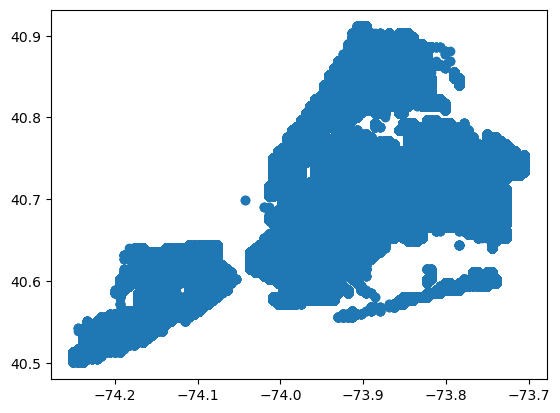

In [78]:
plt.scatter(crime_data['Longitude'], crime_data['Latitude'])

In [79]:
crime_data = crime_data.loc[crime_data['Longitude'] > -74.5]

In [80]:
crime_data = crime_data.loc[crime_data['Latitude'] < 42.5]

In [81]:
crime_data

,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP,year,day_of_week,hour
0,-73.94132,40.80962,F,WHITE,25-44,2018,3,20
1,-73.90765,40.87317,D,UNKNOWN,UNKNOWN,2018,1,23
2,-73.99744,40.75879,F,WHITE HISPANIC,18-24,2018,5,21
3,-73.96938,40.76302,D,UNKNOWN,UNKNOWN,2018,5,19
5,-73.90765,40.85199,D,UNKNOWN,UNKNOWN,2018,2,18
...,...,...,...,...,...,...,...,...
5216995,-73.89082,40.86470,F,BLACK,25-44,2018,5,20
5216996,-73.99744,40.75879,E,UNKNOWN,UNKNOWN,2008,3,18
5216997,-74.10407,40.57662,M,WHITE HISPANIC,<18,2018,4,14
5216998,-74.08723,40.59357,M,WHITE,45-64,2018,5,10


# VIC_SEX

In [82]:
crime_data['VIC_SEX'].unique()

['F', 'D', 'M', 'E', 'U']
Categories (5, object): ['D', 'E', 'F', 'M', 'U']

In [83]:
# Only keep the M and F sex values
sexes = ['M', 'F']

crime_data = crime_data.loc[crime_data['VIC_SEX'].isin(sexes)]
# Re calculate the categories for the Sex column
crime_data['VIC_SEX'] = crime_data['VIC_SEX'].cat.remove_unused_categories()

del sexes
crime_data.head(5)

C:\Users\Kaninik Baradi\AppData\Local\Temp\ipykernel_30696\451495837.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['VIC_SEX'] = crime_data['VIC_SEX'].cat.remove_unused_categories()


,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP,year,day_of_week,hour
0,-73.94132,40.80962,F,WHITE,25-44,2018,3,20
2,-73.99744,40.75879,F,WHITE HISPANIC,18-24,2018,5,21
6,-73.91887,40.82657,F,WHITE HISPANIC,25-44,2018,5,22
7,-73.95255,40.80539,M,BLACK,25-44,2018,2,18
8,-73.76174,40.70795,M,BLACK,25-44,2018,6,11


In [84]:
crime_data['VIC_SEX'].unique()

['F', 'M']
Categories (2, object): ['F', 'M']

# VIC_RACE


In [85]:
crime_data['VIC_RACE'].unique()

['WHITE', 'WHITE HISPANIC', 'BLACK', 'ASIAN / PACIFIC ISLANDER', 'BLACK HISPANIC', 'AMERICAN INDIAN/ALASKAN NATIVE', 'UNKNOWN', 'OTHER']
Categories (8, object): ['AMERICAN INDIAN/ALASKAN NATIVE', 'ASIAN / PACIFIC ISLANDER', 'BLACK', 'BLACK HISPANIC', 'OTHER', 'UNKNOWN', 'WHITE', 'WHITE HISPANIC']

In [86]:
# Keep everything except for UNKNOWN and OTHER
races = ['WHITE', 'WHITE HISPANIC', 'BLACK','ASIAN / PACIFIC ISLANDER', 'BLACK HISPANIC','AMERICAN INDIAN/ALASKAN NATIVE', 'OTHER']

crime_data = crime_data.loc[crime_data['VIC_RACE'].isin(races)]
# Re calculate the categories for the Sex column
crime_data['VIC_RACE'] = crime_data['VIC_RACE'].cat.remove_unused_categories()

del races
crime_data.head(5)

,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP,year,day_of_week,hour
0,-73.94132,40.80962,F,WHITE,25-44,2018,3,20
2,-73.99744,40.75879,F,WHITE HISPANIC,18-24,2018,5,21
6,-73.91887,40.82657,F,WHITE HISPANIC,25-44,2018,5,22
7,-73.95255,40.80539,M,BLACK,25-44,2018,2,18
8,-73.76174,40.70795,M,BLACK,25-44,2018,6,11


In [87]:
crime_data['VIC_RACE'].unique()

['WHITE', 'WHITE HISPANIC', 'BLACK', 'ASIAN / PACIFIC ISLANDER', 'BLACK HISPANIC', 'AMERICAN INDIAN/ALASKAN NATIVE', 'OTHER']
Categories (7, object): ['AMERICAN INDIAN/ALASKAN NATIVE', 'ASIAN / PACIFIC ISLANDER', 'BLACK', 'BLACK HISPANIC', 'OTHER', 'WHITE', 'WHITE HISPANIC']

# VIC_AGE_GROUP

In [88]:
crime_data['VIC_AGE_GROUP'].unique()

array(['25-44', '18-24', '<18', '45-64', '65+', 'UNKNOWN', '-942', '970',
       '-51', '954', '972', '951', '-55', '-966', '-59', '-974', '-948',
       '956', '-81', '-37', '-973', '-5', '-940', '-968', '-943', '-929',
       '-56', '943', '-961', '929', '936', '-954', '-952', '-69', '-946',
       '941', '1013', '-39', '960', '938', '-970', '950', '-2', '-934',
       '-4', '-62', '-3', '-921', '-48', '963', '945', '-935', '-1',
       '-975', '-72', '946', '-959', '1014', '-931', '-972', '949',
       '-965', '932', '-967', '-31', '-963', '-60', '-962', '-937', '-53',
       '-45', '-902', '-63', '-70', '-981', '-964', '-950', '-971',
       '-945', '-32', '922', '-40', '928', '-78', '914', '947', '810',
       '980', '937', '942', '711', '924', '-982', '933', '309', '152',
       '738', '912', '-978', '709', '944', '-976', '812', '948', '-49',
       '160', '214', '927', '934', '953', '809', '931', '311', '908',
       '-955', '-956', '185', '-947', '920', '508', '172', '151', '34

In [89]:
#remove values that don't belong to a victim age group
crime_data['VIC_AGE_GROUP'] = numpy.where(crime_data['VIC_AGE_GROUP'].str.len()==4, None, crime_data['VIC_AGE_GROUP'])
crime_data['VIC_AGE_GROUP'] = numpy.where(crime_data['VIC_AGE_GROUP'].str.startswith("-"), None, crime_data['VIC_AGE_GROUP'])
crime_data['VIC_AGE_GROUP'] = numpy.where(crime_data['VIC_AGE_GROUP'].str.contains("<"), crime_data['VIC_AGE_GROUP'] + ' ', crime_data['VIC_AGE_GROUP'])
crime_data['VIC_AGE_GROUP'] = numpy.where(crime_data['VIC_AGE_GROUP'].str.endswith("+"), crime_data['VIC_AGE_GROUP'] + ' ', crime_data['VIC_AGE_GROUP'])
crime_data['VIC_AGE_GROUP'] = numpy.where(crime_data['VIC_AGE_GROUP'].str.contains("UNKNOWN"), None, crime_data['VIC_AGE_GROUP'])
crime_data['VIC_AGE_GROUP'] = numpy.where(crime_data['VIC_AGE_GROUP'].str.len()==3, None, crime_data['VIC_AGE_GROUP'])

In [90]:
crime_data.head(5)

,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP,year,day_of_week,hour
0,-73.94132,40.80962,F,WHITE,25-44,2018,3,20
2,-73.99744,40.75879,F,WHITE HISPANIC,18-24,2018,5,21
6,-73.91887,40.82657,F,WHITE HISPANIC,25-44,2018,5,22
7,-73.95255,40.80539,M,BLACK,25-44,2018,2,18
8,-73.76174,40.70795,M,BLACK,25-44,2018,6,11


In [91]:
#delete None
crime_data = crime_data.dropna(subset=['VIC_AGE_GROUP'])

In [92]:
crime_data['VIC_AGE_GROUP'].unique()

array(['25-44', '18-24', '<18 ', '45-64', '65+ '], dtype=object)

In [93]:
crime_data.head(5)

,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP,year,day_of_week,hour
0,-73.94132,40.80962,F,WHITE,25-44,2018,3,20
2,-73.99744,40.75879,F,WHITE HISPANIC,18-24,2018,5,21
6,-73.91887,40.82657,F,WHITE HISPANIC,25-44,2018,5,22
7,-73.95255,40.80539,M,BLACK,25-44,2018,2,18
8,-73.76174,40.70795,M,BLACK,25-44,2018,6,11


# One hot encoding

In [94]:
one_hot_encoded = pandas.get_dummies(crime_data[['VIC_SEX','VIC_RACE','VIC_AGE_GROUP']])
one_hot_encoded

,VIC_SEX_F,VIC_SEX_M,VIC_RACE_AMERICAN INDIAN/ALASKAN NATIVE,VIC_RACE_ASIAN / PACIFIC ISLANDER,VIC_RACE_BLACK,VIC_RACE_BLACK HISPANIC,VIC_RACE_OTHER,VIC_RACE_WHITE,VIC_RACE_WHITE HISPANIC,VIC_AGE_GROUP_18-24,VIC_AGE_GROUP_25-44,VIC_AGE_GROUP_45-64,VIC_AGE_GROUP_65+,VIC_AGE_GROUP_<18
0,True,False,False,False,False,False,False,True,False,False,True,False,False,False
2,True,False,False,False,False,False,False,False,True,True,False,False,False,False
6,True,False,False,False,False,False,False,False,True,False,True,False,False,False
7,False,True,False,False,True,False,False,False,False,False,True,False,False,False
8,False,True,False,False,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5216994,False,True,False,False,False,True,False,False,False,False,False,True,False,False
5216995,True,False,False,False,True,False,False,False,False,False,True,False,False,False
5216997,False,True,False,False,False,False,False,False,True,False,False,False,False,True
5216998,False,True,False,False,False,False,False,True,False,False,False,True,False,False


In [95]:
one_hot_encoded_df = crime_data

# concatenate the one-hot encoded columns with the original dataframe
one_hot_encoded_df = pandas.concat([one_hot_encoded_df, one_hot_encoded], axis=1)


In [96]:
one_hot_encoded_df

,Longitude,Latitude,VIC_SEX,VIC_RACE,VIC_AGE_GROUP,year,day_of_week,hour,VIC_SEX_F,VIC_SEX_M,...,VIC_RACE_BLACK,VIC_RACE_BLACK HISPANIC,VIC_RACE_OTHER,VIC_RACE_WHITE,VIC_RACE_WHITE HISPANIC,VIC_AGE_GROUP_18-24,VIC_AGE_GROUP_25-44,VIC_AGE_GROUP_45-64,VIC_AGE_GROUP_65+,VIC_AGE_GROUP_<18
0,-73.94132,40.80962,F,WHITE,25-44,2018,3,20,True,False,...,False,False,False,True,False,False,True,False,False,False
2,-73.99744,40.75879,F,WHITE HISPANIC,18-24,2018,5,21,True,False,...,False,False,False,False,True,True,False,False,False,False
6,-73.91887,40.82657,F,WHITE HISPANIC,25-44,2018,5,22,True,False,...,False,False,False,False,True,False,True,False,False,False
7,-73.95255,40.80539,M,BLACK,25-44,2018,2,18,False,True,...,True,False,False,False,False,False,True,False,False,False
8,-73.76174,40.70795,M,BLACK,25-44,2018,6,11,False,True,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5216994,-73.94132,40.84351,M,BLACK HISPANIC,45-64,2018,2,17,False,True,...,False,True,False,False,False,False,False,True,False,False
5216995,-73.89082,40.86470,F,BLACK,25-44,2018,5,20,True,False,...,True,False,False,False,False,False,True,False,False,False
5216997,-74.10407,40.57662,M,WHITE HISPANIC,<18,2018,4,14,False,True,...,False,False,False,False,True,False,False,False,False,True
5216998,-74.08723,40.59357,M,WHITE,45-64,2018,5,10,False,True,...,False,False,False,True,False,False,False,True,False,False


In [97]:
# drop the VIC_SEX, VIC_Race, and VIC_AGE_GROUP columns
one_hot_encoded_df = one_hot_encoded_df.drop('VIC_SEX', axis=1)
one_hot_encoded_df = one_hot_encoded_df.drop('VIC_RACE', axis=1)
one_hot_encoded_df = one_hot_encoded_df.drop('VIC_AGE_GROUP', axis=1)

In [98]:
crime_counts = (
    one_hot_encoded_df.groupby(['Longitude', 'Latitude', 'year', 'day_of_week', 'hour'])
    .sum()
)

In [99]:
crime_counts.reset_index(inplace=True)
crime_counts

,Longitude,Latitude,year,day_of_week,hour,VIC_SEX_F,VIC_SEX_M,VIC_RACE_AMERICAN INDIAN/ALASKAN NATIVE,VIC_RACE_ASIAN / PACIFIC ISLANDER,VIC_RACE_BLACK,VIC_RACE_BLACK HISPANIC,VIC_RACE_OTHER,VIC_RACE_WHITE,VIC_RACE_WHITE HISPANIC,VIC_AGE_GROUP_18-24,VIC_AGE_GROUP_25-44,VIC_AGE_GROUP_45-64,VIC_AGE_GROUP_65+,VIC_AGE_GROUP_<18
0,-74.24998,40.50037,2006,0,17,2,0,0,0,0,0,0,2,0,0,0,0,0,2
1,-74.24998,40.50037,2006,1,13,0,1,0,0,0,0,0,1,0,0,0,1,0,0
2,-74.24998,40.50037,2006,3,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0
3,-74.24998,40.50037,2006,6,17,1,0,0,0,0,0,0,1,0,0,0,1,0,0
4,-74.24998,40.50037,2007,3,11,1,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178295,-73.70562,40.75455,2021,5,16,0,1,0,1,0,0,0,0,0,0,1,0,0,0
2178296,-73.70562,40.75455,2021,6,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0
2178297,-73.70562,40.75455,2021,6,14,1,0,0,1,0,0,0,0,0,1,0,0,0,0
2178298,-73.70562,40.75455,2021,6,16,1,0,0,1,0,0,0,0,0,0,1,0,0,0


# Trees

In [100]:
rows = 50000

trees = gpd.read_file('../data/2015 Street Tree Census - Tree Data.geojson', rows=rows)
# trees = trees.to_crs(epsg=4326)
trees

,nta,health,zipcode,latitude,nta_name,state,trnk_wire,y_sp,brnch_othe,root_grate,...,address,sidewalk,root_other,created_at,borocode,block_id,trnk_light,tree_dbh,root_stone,geometry
0,QN17,Fair,11375,40.72309177,Forest Hills,New York,No,202756.768749,No,No,...,108-005 70 AVENUE,NoDamage,No,08/27/2015,4,348711,No,3,No,POINT (-73.84422 40.72309)
1,QN49,Fair,11357,40.79411067,Whitestone,New York,No,228644.837379,No,No,...,147-074 7 AVENUE,Damage,No,09/03/2015,4,315986,No,21,Yes,POINT (-73.81868 40.79411)
2,BK90,Good,11211,40.71758074,East Williamsburg,New York,No,200716.891267,No,No,...,390 MORGAN AVENUE,Damage,No,09/05/2015,3,218365,No,3,No,POINT (-73.93661 40.71758)
3,BK90,Good,11211,40.71353749,East Williamsburg,New York,No,199244.253136,No,No,...,1027 GRAND STREET,Damage,No,09/05/2015,3,217969,No,10,Yes,POINT (-73.93446 40.71354)
4,BK37,Good,11215,40.66677776,Park Slope-Gowanus,New York,No,182202.425999,No,No,...,603 6 STREET,Damage,No,08/30/2015,3,223043,No,21,Yes,POINT (-73.97598 40.66678)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,QN71,Good,11102,40.77005417,Old Astoria,New York,Yes,219838.002959,No,No,...,26-031 28 STREET,NoDamage,No,09/25/2015,4,301525,No,9,No,POINT (-73.92156 40.77005)
49996,BK63,Good,11225,40.66517577,Crown Heights South,New York,No,181622.14796,No,No,...,502 MONTGOMERY STREET,NoDamage,No,09/19/2015,3,227121,No,5,No,POINT (-73.94799 40.66518)
49997,MN34,Good,10035,40.80402046,East Harlem North,New York,No,232209.043506,No,No,...,100 EAST 123 STREET,Damage,No,09/19/2015,1,110425,No,9,No,POINT (-73.94002 40.80402)
49998,QN28,Good,11370,40.75738992,Jackson Heights,New York,No,215233.278245,No,No,...,31-045 77 STREET,Damage,No,09/22/2015,4,341646,No,26,Yes,POINT (-73.89038 40.75739)


In [101]:
# drop the columns that we don't need
trees = trees[['health', 'longitude', 'latitude']]


In [102]:

# query the KD Tree with the Longitude and Latitude columns of crime_data
distances, indices = kd_tree.query(trees[['longitude', 'latitude']])

# use the indices to get the corresponding Longitude and Latitude values from filtered_grid_df
trees['Longitude'] = filtered_grid_df.loc[indices, 'Longitude'].values
trees['Latitude'] = filtered_grid_df.loc[indices, 'Latitude'].values

tree_counts = (
    trees.groupby(['Longitude', 'Latitude','health'])
    .size()
    .reset_index(name='tree_count')
)


C:\Users\Kaninik Baradi\AppData\Local\Temp\ipykernel_30696\3889633532.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trees['Longitude'] = filtered_grid_df.loc[indices, 'Longitude'].values
C:\Users\Kaninik Baradi\AppData\Local\Temp\ipykernel_30696\3889633532.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trees['Latitude'] = filtered_grid_df.loc[indices, 'Latitude'].values


In [103]:
tree_counts.head()

tree_counts_pivoted = pandas.pivot_table(tree_counts, values='tree_count', index=['Longitude', 'Latitude'], columns=['health'], fill_value=0)
tree_counts_pivoted = tree_counts_pivoted.reset_index().rename(columns={'Good': 'good_tree_count', 'Fair': 'fair_tree_count', 'Poor': 'poor_tree_count'})

# Remove index name
tree_counts_pivoted.index.name = None

In [104]:
tree_counts_pivoted

health,Longitude,Latitude,fair_tree_count,good_tree_count,poor_tree_count
0,-74.24998,40.50461,0,11,0
1,-74.24998,40.50884,0,10,0
2,-74.24437,40.50037,0,7,0
3,-74.23876,40.50037,4,18,0
4,-74.22192,40.50884,0,2,0
...,...,...,...,...,...
1693,-73.71123,40.75032,2,5,0
1694,-73.70562,40.74184,2,1,0
1695,-73.70562,40.74608,42,141,5
1696,-73.70562,40.75032,19,60,5


# Feature Creation

In [105]:
import itertools

def point_hour_day_combinations(points, hours, days_of_week, years):
    for point, hour, day, year in itertools.product(points, hours, days_of_week, years):
        yield point.x, point.y, hour, day, year

# Convert filtered grid points to a list of Point objects
points = [Point(lon, lat) for lon, lat in filtered_grid_df[['Longitude', 'Latitude']].values]

# Define hours and days_of_week
hours = range(24)
days_of_week = range(7)
years = range(2006, 2021)

In [106]:
crime_

NameError: name 'crime_' is not defined

In [107]:
all_combinations = np.array(list(point_hour_day_combinations(points, hours, days_of_week, years)))
crime_counts.set_index(['Longitude', 'Latitude', 'hour', 'day_of_week', 'year'], inplace=True)

In [109]:
matched_data = crime_counts.reindex(
    pandas.MultiIndex.from_arrays(all_combinations.T, names=crime_counts.index.names),
    fill_value=0
)
matched_data.reset_index(inplace=True)

matched_data = matched_data.merge(tree_counts_pivoted, on=['Longitude', 'Latitude'], how='left').fillna(0)

In [110]:
matched_data

,Longitude,Latitude,hour,day_of_week,year,VIC_SEX_F,VIC_SEX_M,VIC_RACE_AMERICAN INDIAN/ALASKAN NATIVE,VIC_RACE_ASIAN / PACIFIC ISLANDER,VIC_RACE_BLACK,...,VIC_RACE_WHITE,VIC_RACE_WHITE HISPANIC,VIC_AGE_GROUP_18-24,VIC_AGE_GROUP_25-44,VIC_AGE_GROUP_45-64,VIC_AGE_GROUP_65+,VIC_AGE_GROUP_<18,fair_tree_count,good_tree_count,poor_tree_count
0,-74.24998,40.50037,0.0,0.0,2006.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
1,-74.24998,40.50037,0.0,0.0,2007.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
2,-74.24998,40.50037,0.0,0.0,2008.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
3,-74.24998,40.50037,0.0,0.0,2009.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
4,-74.24998,40.50037,0.0,0.0,2010.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8837635,-73.70562,40.75455,23.0,6.0,2016.0,1,0,0,0,1,...,0,0,0,1,0,0,0,1.0,4.0,0.0
8837636,-73.70562,40.75455,23.0,6.0,2017.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,4.0,0.0
8837637,-73.70562,40.75455,23.0,6.0,2018.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,4.0,0.0
8837638,-73.70562,40.75455,23.0,6.0,2019.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,4.0,0.0


In [ ]:
# Create columns in matched 

In [ ]:
import pickle

with open('merged_data.pickle', 'wb') as f:
    pickle.dump(matched_data, f)

# LAB 4

## Proxies

In [ ]:
corr_matrix = matched_data.corr().round(2)
# print(corr_matrix)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(40,40))       
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask, ax=ax)
plt.show()

## Representation bias

In [ ]:
import pickle

with open('merged_data.pickle', 'rb') as f:
    matched_data = pickle.load(f, encoding='binary')
matched_data

In [ ]:
merged_data2010 = matched_data.loc[matched_data['year'] == 2010]

In [ ]:
merged_data2010

In [ ]:
total_male = merged_data2010['VIC_SEX_M'].sum()
total_female = merged_data2010['VIC_SEX_F'].sum()


In [ ]:
x = ['F', 'M']  # categories
y = [total_female, total_male]  # values
bin_edges = range(len(x) + 1)  # define bin edges

plt.bar(x, y)
plt.xticks(range(len(x)), x)
plt.xlabel('Sex of victims')
plt.ylabel('Number of victims')
plt.title('Sex distribution of victims')
plt.plot(range(len(x)), [167849, 151816], 'o--', c='red', linewidth=0, markersize=8, label='Expected sex distribution according to New York Census 2010')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
total_18 = merged_data2010.iloc[:, 17].sum()
total_24 = merged_data2010['VIC_AGE_GROUP_18-24'].sum()
total_44 = merged_data2010['VIC_AGE_GROUP_25-44'].sum()
total_64 = merged_data2010['VIC_AGE_GROUP_45-64'].sum()
total_65 = merged_data2010.iloc[:, 16].sum()

In [ ]:
x = ['<18', '18-24', '25-44', '45-64', '65+']
y = [total_18, total_24, total_44, total_64, total_65]

bin_edges = np.arange(len(x) + 1) - 0.5  # add a half bin width to shift the edges to the center of the bars
bin_edges = range(len(x) + 1)  # define bin edges

plt.bar(x, y)
plt.xticks(range(len(x)), x)
plt.xlabel('Age group of victims')
plt.ylabel('Number of victims')
plt.title('Age group distribution of victims')
plt.plot(range(len(x)), [69137, 33993, 99598, 78102, 38835], 'o--', c='red', linewidth=0, markersize=8, label='Expected age distribution according to New York Census 2010')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
white_hispanic = merged_data2010['VIC_RACE_WHITE HISPANIC'].sum()
black = merged_data2010['VIC_RACE_BLACK'].sum()
white = merged_data2010['VIC_RACE_WHITE'].sum()
black_hispanic = merged_data2010['VIC_RACE_BLACK HISPANIC'].sum()
asian_pacific = merged_data2010['VIC_RACE_ASIAN / PACIFIC ISLANDER'].sum()
american_alaskan = merged_data2010['VIC_RACE_AMERICAN INDIAN/ALASKAN NATIVE'].sum()
other = merged_data2010['VIC_RACE_OTHER'].sum()

In [ ]:
x = ['WH','B','W','BH','A/P','A/A', 'Other']
y = [white_hispanic, black, white, black_hispanic, asian_pacific, american_alaskan, other]

bin_edges = np.arange(len(x) + 1) - 0.5  # add a half bin width to shift the edges to the center of the bars
bin_edges = range(len(x) + 1)  # define bin edges

plt.bar(x, y)
plt.xticks(range(len(x)), x)
plt.xlabel('Race group of victims')
plt.ylabel('Number of victims')
plt.title('Race group distribution of victims')
plt.plot(range(len(x)), [45673 , 72781, 106471, 45673, 40311, 681 ,2262], 'o--', c='red', linewidth=0, markersize=8, label='Expected race distribution according to New York Census 2010')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Historical bias

In [ ]:
non_victim_male = 3882544 - merged_data2010['VIC_SEX_M'].sum()
non_victim_female = 4292589 - merged_data2010['VIC_SEX_F'].sum()

In [ ]:
import matplotlib.ticker as ticker

# Define the data and log scale it
victims = [total_male, total_female]
non_victims = [non_victim_male, non_victim_female]

labels = ['male', 'female']
colors = ['orange', 'blue']

# Create the stacked bar plot
x = np.arange(len(labels))
plt.bar(x, victims, color=colors[0], label='victims')
plt.bar(x, non_victims, bottom=victims, color=colors[1], label='non_victims')
plt.xticks(x, labels)
plt.ylabel('Value')
plt.title('Stacked Bar Plot with Two Numbers')
plt.legend()

# Set y-axis to log scale and adjust limits
plt.yscale('log')
plt.ylim([1, 10**7])

# Set y-axis tick labels to display original scale values

# Show the plot
plt.show()

In [ ]:
non_victim_male

In [ ]:
non_victim_18 = 1768111 - merged_data2010.iloc[:, 17].sum()
non_victim_24 = merged_data2010['VIC_AGE_GROUP_18-24'].sum()
non_victim_44 = merged_data2010['VIC_AGE_GROUP_25-44'].sum()
non_victim_64 = merged_data2010['VIC_AGE_GROUP_45-64'].sum()
non_victim_65 = merged_data2010.iloc[:, 16].sum()

# Predictive Analytics